# <center>Моделирование случайных событий</center>

### Генератор

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def congruent_mult_generator(a0, k, m):
    num = a0
    while True:
        num = (k * num) % m 
        yield num

In [3]:
def gen_dist_histogram(sequence_numbers, interval_number, total_count):
    plt.figure(figsize=(12, 6), dpi=60)
    counts, edges = np.histogram(sequence_numbers, interval_number)
    plt.hist(edges[:-1], edges, weights=[v / total_count for v in counts])
    plt.plot([0, 1], [1 / interval_number] * 2, '-', color='r', linewidth=2)


In [4]:
a0 = 162354761
k = 176315267
m = 1073741824

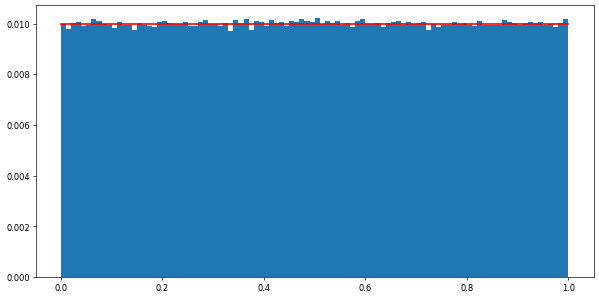

In [27]:
sample_size, interval_number = 10**6, 100
intervals = np.linspace(0, 1, interval_number)

generator = congruent_mult_generator(a0, k, m)
sequence = [next(generator) / m for _ in range(sample_size)]
gen_dist_histogram(sequence, interval_number, sample_size)
    
plt.show()

### 1)

In [5]:
def generator_1(prob):
    generator = congruent_mult_generator(a0, k, m)
    while True:
        yield next(generator) / m < prob
    

def test_task_1(prob, amount):
    counter = 0
    generator = generator_1(prob)
    for i in range(amount):
        if next(generator) == True:
            counter+=1
    return counter

    


In [35]:
print("Введите вероятность")
prob = float(input())
amount = 10**6
practical = test_task_1(prob, amount)


print(f"Теоретическая частота: {prob}")
print(f"Практическая частота: {practical / amount}")

Введите вероятность
0.5
Теоретическая частота: 0.5
Практическая частота: 0.499761


### 2)

In [6]:
def generator_2(probs):
    generator = congruent_mult_generator(a0, k, m)
    while True:
        result = []
        for i in probs:
             result.append(next(generator) / m < i)
        yield result


def test_task_2(probs, amount):
    counter = [0] * len(probs)
    generator = generator_2(probs)
    for _ in range(amount):
        for i, val in enumerate(next(generator)):
            counter[i] += int(val)
    return counter

In [36]:
probs = []
print("Введите список вероятностей")
for i in input().split():
    probs.append(float(i))
amount = 10**6
practical = test_task_2(probs, amount)

print(f"Теоретические частоты: {probs}")
print(f"Практические частоты: {[i / amount for i in practical]}")

Введите список вероятностей
0.1 0.76 0.99
Теоретические частоты: [0.1, 0.76, 0.99]
Практические частоты: [0.099513, 0.759716, 0.990144]


### 3)

In [24]:
def calculate_conditional_probabilities(p_A, p_B_A):
    p_nA = 1 - p_A
    p_B = p_B_A * p_A + (1 - p_B_A) * (1 - p_A)
    p_A_B = p_B_A * p_A / p_B
    p_nA_B = 1 - p_A_B
    p_nB_A = 1 - p_B_A
    p_AB = p_A * p_B_A
    p_AnB = p_A * p_nB_A
    p_nAB = p_B * p_nA_B
    p_nAnB = 1 - p_AB - p_AnB - p_nAB
    #print ([p_AB, p_AnB, p_nAB, p_nAnB])
    return [p_AB, p_AnB, p_nAB, p_nAnB]

def generator_3(p_A, p_B_A):
    res = calculate_conditional_probabilities(p_A, p_B_A)
    generator = generator_4(res)
    while True:
        yield next(generator)

def test_task_3(p_A, p_B_A, amount):
    counter = [0] * 4
    generator = generator_3(p_A, p_B_A)
    for i in range(amount):
        ind = next(generator)
        counter[ind]+=1
    return counter


In [25]:
print("Введите список вероятность P(A)")
p_A = float(input())
print("Введите список вероятность P(B | A)")
p_B_A = float(input())
amount = 10**6
practical = test_task_3(p_A, p_B_A, amount)


print(f"Теоретические частоты: {calculate_conditional_probabilities(p_A, p_B_A)}")
print(f"Практические частоты: {[i / amount for i in practical]}")

Введите список вероятность P(A)
0.4
Введите список вероятность P(B | A)
0.7
Теоретические частоты: [0.27999999999999997, 0.12000000000000002, 0.17999999999999997, 0.42000000000000004]
Практические частоты: [0.279252, 0.120011, 0.180792, 0.419945]


### 4)

In [26]:
def generator_4(probs):
    generator = congruent_mult_generator(a0, k, m)
    while True:
        if sum(probs) > 1:
            raise ValueError("Аргумент не является полной группой!")
        position = next(generator) / m
        acc = 0
        res = 0
        for i in range(len(probs)):
            acc += probs[i]
            if position <= acc:
                res = i
                break
        yield res



def test_task_4(probs, amount):
    counter = [0] * len(probs)
    generator = generator_4(probs)
    for i in range(amount):
        ind = next(generator)
        counter[ind]+=1
    return counter

In [27]:
probs = []
print("Введите список вероятностей")
for i in input().split():
    probs.append(float(i))
amount = 10**6
practical = test_task_4(probs, amount)

print(f"Теоретические частоты: {probs}")
print(f"Практические частоты: {[i / amount for i in practical]}")

Введите список вероятностей
0.2 0.3 0.1 0.4
Теоретические частоты: [0.2, 0.3, 0.1, 0.4]
Практические частоты: [0.199235, 0.300526, 0.100575, 0.399664]


### Генератор 2

In [9]:
from datetime import datetime

def congruent_mult_exp_generator(a0, k, b, m):
    num = a0
    ms = datetime.now().microsecond
    while True:
        next_val = (k * num * ms + b) % m 
        if num != next_val:
            num = next_val
        else:
            num+=1
            continue
        yield num

In [10]:
def exp_gen_dist_histogram(sequence_numbers, interval_amount, total_count):
    plt.figure(figsize=(12, 6), dpi=60)
    counts, bins = np.histogram(sequence_numbers, interval_amount)
    plt.hist(bins[:-1], bins, weights=[v / total_count for v in counts])
    plt.plot([0, 1], [1 / interval_amount] * 2, '-', color='r', linewidth=2)

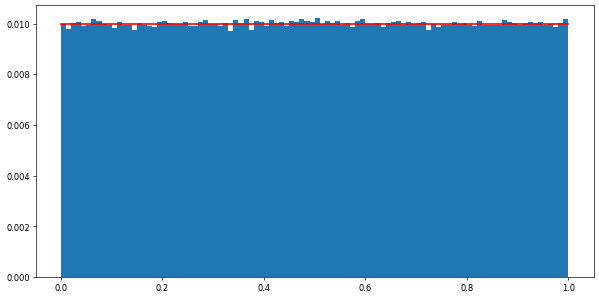

In [34]:
a0 = 162354761
k = 176315267
b = 123
m = 1073741824


sample_size, interval_number = 10**6, 100
intervals = np.linspace(0, 1, interval_number)

generator = congruent_mult_generator(a0, k, m)
sequence = [next(generator) / m for _ in range(sample_size)]
gen_dist_histogram(sequence, interval_number, sample_size)
    
plt.show()

In [ ]:
def test_prob_exp(prob, amount):
    seq_gen = congruent_mult_exp_gen(a0, k, b, m)
    for i in range(amount):
        print(next(seq_gen) / m < prob)

### Имитация Рулетки

In [13]:
import random
import math
from IPython.display import HTML, display
from matplotlib import pyplot as plt 
import numpy as np 
from matplotlib.animation import FuncAnimation 
from sympy import *
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [14]:
games = []
deposits = []
probabilities = []

In [15]:
def add_to_list(name, amount):
    if amount <= 0:
        raise ValueError("Deposit should be positive")
    if name in games:
        ind = games.index(name)
        deposits[ind] += amount
    else:
        games.append(name)
        deposits.append(amount)


In [16]:
def donate():
    print("Название игры: ")
    name = input()
    print("Сумма: ")
    amount = int(input())
    add_to_list(name, amount)

In [ ]:
donate()

Название игры: 


In [17]:

def seed_list():
    games.clear()
    deposits.clear()
    probabilities.clear()
    add_to_list('Witcher 3', 250)
    add_to_list('Witcher 3', 50)
    add_to_list('Fortnite', 200)
    add_to_list('Minecraft', 100)
    add_to_list("Assassin's Creed", 120)
    add_to_list('Dark Souls', 120)
    add_to_list('Stray', 100)
    
seed_list()

#print(deposits)

In [18]:
print(games)

['Witcher 3', 'Fortnite', 'Minecraft', "Assassin's Creed", 'Dark Souls', 'Stray']


In [19]:
def calculate_percents():
    probabilities.clear()
    sumd = sum(deposits)
    for i in range(len(deposits)):
        probabilities.append(deposits[i] / sumd)
    


In [20]:
def generate_angle(num):
    generator = congruent_mult_generator(a0, k-4, m)
    while True:
        sump = sum(probabilities[:num])
        base = 360 * sump
        offset = 360 * next(generator) / m * probabilities[num]
        yield base + offset

In [21]:
def get_eq_solution(value, angle_step, parts_number):
    
    x = Symbol('x', real=True)
    eq = 0
    for i in range(parts_number):
        eq +=  x**i
    eq = eq * angle_step - value
    return nsolve(eq, x, 2)



In [22]:
generator = generator_4(probabilities)

def roll():

    calculate_percents()
    
    value = next(generator)
    #print(value)
    angle = int (next(generate_angle(value)))
    #print(angle)
    

    angle_step = 90
    stable_parts = 40
    decreasing_parts = 20
    iteration_number = 60

    rolling_angle = 360 + angle
    coeff= get_eq_solution(rolling_angle, angle_step, decreasing_parts)
    
    
    fig,ax = plt.subplots()

    def animate(i, angle_step, stable_parts, decreasing_parts, iteration_number, coeff):
        ax.clear()
        ax.axis('equal')
        if i < stable_parts:
            ax.pie(deposits, labels=games, autopct='%1.1f%%', radius=1.4, shadow=False, labeldistance=1.1, startangle=-i*angle_step) 
        else:
            pos=0
            for v in range(i-stable_parts):
                pos += angle_step * coeff**(v)
            #print(pos)
            ax.pie(deposits, labels=games, autopct='%1.1f%%', radius=1.4, shadow=False, labeldistance=1.1, startangle=-int(pos))

        legend_elements = [Line2D([0], [0], marker='<', color='w', label='', markerfacecolor='g', markersize=15)]
        ax.legend(handles=legend_elements, loc='right')

    anim = FuncAnimation(fig, animate, frames=range(iteration_number), repeat=False, 
                         fargs=(angle_step, stable_parts, decreasing_parts, iteration_number, coeff)) 
    display(HTML(anim.to_jshtml()))
    
    print(f"Победитель: {games[value]}")

Победитель: Stray


Победитель: Witcher 3


Победитель: Fortnite


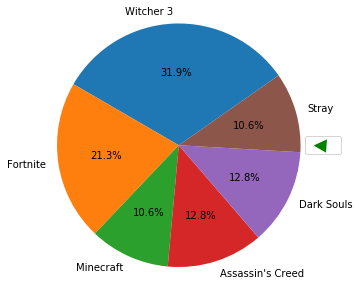

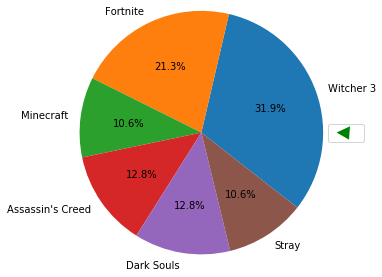

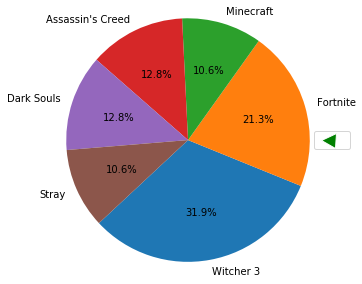

In [23]:
for i in range(1):
    roll()